## Feature Engineering: Feature Transformation

### Read in text

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [2]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [3]:
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,punct%
0,ham,I've been searching for the right words to tha...,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",4.1
3,ham,Even my brother is not like to speak with me. ...,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,7.1


In [4]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,punct%,body_len
0,ham,I've been searching for the right words to tha...,2.5,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,4.7,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",4.1,49
3,ham,Even my brother is not like to speak with me. ...,3.2,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,7.1,28


### Plot the two new features

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

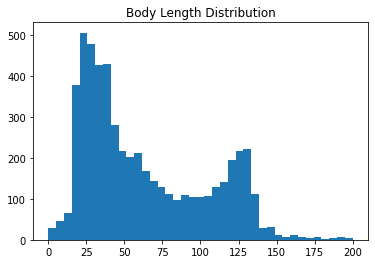

In [11]:
bins = np.linspace(0, 200, 40)

plt.hist(data['body_len'], bins=bins)
plt.title('Body Length Distribution')
plt.show()

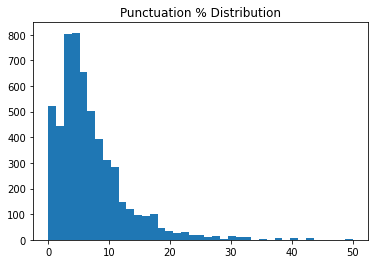

In [12]:
bins = np.linspace(0, 50, 40)

plt.hist(data['punct%'], bins=bins)
plt.title('Punctuation % Distribution')
plt.show()

### Transform the punctuation % feature

### Box-Cox Power Transformation

**Process**

1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine whihc transformations yield the best distribution

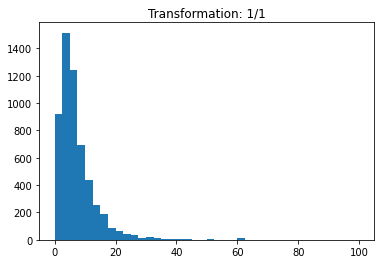

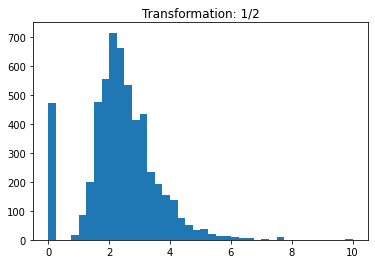

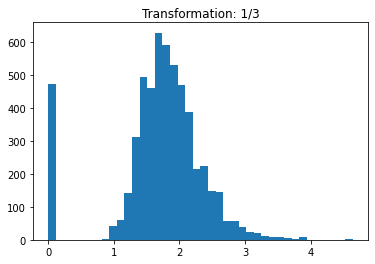

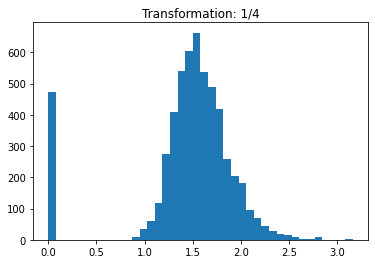

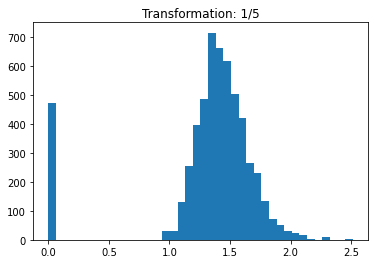

In [19]:
for i in [1, 2, 3, 4, 5]:
    
    plt.hist(data['punct%']**(1/i), bins=40)
    plt.title(f"Transformation: 1/{str(i)}")
    plt.show()